In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### DATA IMPORTING
#### Dataset of over 10,000 playstore apps with details on Category, Rating, Price, Genres etc.

In [2]:
data = pd.read_csv("./googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### DATA CLEANING
#### Converting the non numeric values for later processing, removing spurious values and filling null data. The focus columns would be Rating, Installs, Price and Reviews for now.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data[data['Rating']>5.0]
#data[data['Android Ver'].isnull()]
#data[data['Content Rating'].isnull()]
#data[data['Content Rating'].isnull()]
data.index[data['Rating']>5.0].tolist()

[10472]

In [7]:
data.drop(data.index[data['Rating']>5.0].tolist(), axis = 0, inplace = True)
data["Current Ver"].fillna(str(data["Current Ver"].mode().values[0]),inplace = True)
data["Android Ver"].fillna(str(data["Android Ver"].mode().values[0]),inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [9]:
#convert REviews, Installs and Price to numeric
data.Installs = data.Installs.apply(lambda x: x.replace(',','').replace('+','')).astype(int)
data.Reviews = data.Reviews.astype(int)
data.Price = data.Price.apply(lambda x: x.replace('$','')).astype(float)

In [10]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.1+ MB


In [12]:
data.Rating.fillna(data.Rating.mean(),inplace = True)
data.Type.fillna(str(data.Type.mode()),inplace = True)

In [13]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Plotting data

In [70]:
x = data.groupby('Category')[['Rating']].mean()
y = data.groupby('Category')[['Price']].sum()
z = data.groupby('Category')[['Installs']].mean()
labels= [lable for lable , df in data.groupby('Category')]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


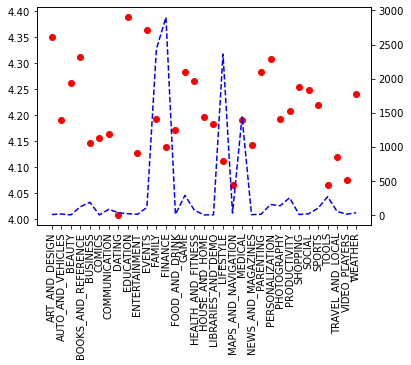

In [79]:

fig, ax1 = plt.subplots()

ax1.plot(x,'ro')
ax2 = ax1.twinx()
ax2.plot(y, 'b--')
ax1.set_xticklabels(labels, rotation=90)
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(x,'ro')
ax2 = ax1.twinx()

ax2.plot(y, 'b--')
ax1.set_xticklabels(labels, rotation=90)
plt.show()

In [36]:
index = data[data['Price'] > 30.0].index.tolist() 

In [38]:
pricy_app = data.loc[index]

In [39]:
pricy_app.describe()

,Rating,Reviews,Installs,Price
count,31.000000,31.000000,31.000000,31.000000
mean,4.010244,316.741935,7265.354839,248.990645
std,0.361684,705.862214,19535.159258,164.648316
min,2.900000,0.000000,0.000000,30.990000
25%,3.800000,4.000000,10.000000,77.490000
50%,4.191757,92.000000,1000.000000,379.990000
75%,4.191757,215.500000,5000.000000,399.990000
max,4.600000,3547.000000,100000.000000,400.000000


In [48]:
bad_pricy_app = data[(data['Price'] > 5.0) & (data['Rating'] < 3.5)]
bad_pricy_app.sort_values('Price', ascending = 0).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
2266,EMT PASS,MEDICAL,3.4,51,2.4M,1000,Paid,29.99,Everyone,Medical,"October 22, 2014",2.0.2,4.0 and up
2387,EMT PASS,MEDICAL,3.4,51,2.4M,1000,Paid,29.99,Everyone,Medical,"October 22, 2014",2.0.2,4.0 and up
6837,SkyTest BU/GU Lite,BUSINESS,2.9,28,20M,500,Paid,17.99,Everyone,Business,"October 24, 2017",2.0.5,3.0 and up
7894,Interactive CT and MRI Anatomy,MEDICAL,3.4,35,24M,1000,Paid,15.46,Everyone,Medical,"May 27, 2015",2.0.3,2.2 and up


In [52]:
#bad_pricy_app['Count'] = 1.0
bad_pricy_app.groupby('Category').count()['Count']

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Category
BUSINESS               1
DATING                 1
FAMILY                 1
LIFESTYLE              1
MAPS_AND_NAVIGATION    1
MEDICAL                4
PRODUCTIVITY           2
TOOLS                  1
Name: Count, dtype: int64